![Image header](Fraud%20Image.png)

**Authors:** Janet Atunga, Colins Wanjao, Anita Bosibori, Ruth Kamau, Bernard Kinyua, Joyleen Cherono

**Date Created:** 06-02-2024

**Discipline:** DS-PT05

<h1 style="background-color: #cfe2f3; padding: 10px; color: black;"><b>Leveraging Machine Learning For Credit Card Fraud Detection</b></h1>

## Executive Summary

## Business Problem

In an increasingly digital economy, fraudulent transactions pose a significant threat to both financial institutions and their customers. Despite the implementation of various security measures, credit card fraud continues to evolve, resulting in financial losses and compromised trust. The challenge lies in effectively detecting fraudulent transactions in real-time while minimizing false positives to ensure a seamless customer experience. Therefore, the business problem at hand is to develop an accurate and efficient machine learning model that can identify fraudulent credit card transactions with a high level of precision, enabling timely intervention and mitigation to safeguard both the financial institution's assets and its customers' trust

## Research Questions

## Data Understanding

In [2]:
pip install --upgrade scikit-learn


Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\envs\learn-env\lib\site-packages (1.3.2)Note: you may need to restart the kernel to use updated packages.



In [39]:
# Import Standard Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


# Import classifier libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Other libraries

from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")



In [4]:
import sklearn
print(sklearn.__version__)

1.3.2


### Loading and Inspecting Data Set

In [5]:
df = pd.read_csv('creditcardFraud.csv', index_col=0)

In [6]:
# Previewing the dataset

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60980,49591.0,-1.078058,0.472978,0.872587,-1.693499,-0.473819,-1.394841,0.390493,0.208516,-1.746987,...,-0.077302,-0.601560,0.095988,0.334340,0.093190,-0.666101,0.158345,0.063077,56.0,0
259679,159224.0,0.140654,0.614854,-0.811093,0.210524,1.090949,-1.436960,1.488835,-0.521849,-0.448717,...,0.364569,1.180486,-0.027099,0.042148,-0.693194,-0.117583,0.242936,0.270430,49.0,0
102727,68332.0,1.492525,-0.937371,0.733062,-1.341682,-1.638440,-0.891609,-1.008324,-0.229074,-1.878821,...,-0.355095,-0.638729,0.164058,0.365213,0.160463,-0.414044,0.047972,0.032811,18.6,0
239078,149947.0,-0.239639,1.464496,-1.486780,-0.021256,-0.058483,-1.380374,0.262271,0.503499,-0.224797,...,0.371395,0.894852,-0.052035,-0.185209,-0.244038,-0.152268,-0.322308,-0.117872,22.5,0
152955,97655.0,2.067000,0.396577,-2.528664,0.231966,1.029264,-1.260592,0.644661,-0.469112,1.178047,...,-0.015175,0.257566,-0.031586,0.653762,0.392559,0.145512,-0.109600,-0.058973,16.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 60980 to 271634
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    80000 non-null  float64
 1   V1      80000 non-null  float64
 2   V2      80000 non-null  float64
 3   V3      80000 non-null  float64
 4   V4      80000 non-null  float64
 5   V5      80000 non-null  float64
 6   V6      80000 non-null  float64
 7   V7      80000 non-null  float64
 8   V8      80000 non-null  float64
 9   V9      80000 non-null  float64
 10  V10     80000 non-null  float64
 11  V11     80000 non-null  float64
 12  V12     80000 non-null  float64
 13  V13     80000 non-null  float64
 14  V14     80000 non-null  float64
 15  V15     80000 non-null  float64
 16  V16     80000 non-null  float64
 17  V17     80000 non-null  float64
 18  V18     80000 non-null  float64
 19  V19     80000 non-null  float64
 20  V20     80000 non-null  float64
 21  V21     80000 non-null  float6

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Count and normalize non-fraudulent transactions
non_fraud_count = df['Class'].value_counts()[0]
non_fraud_percentage = df['Class'].value_counts(normalize=True)[0]

# Count and normalize fraudulent transactions
fraud_count = df['Class'].value_counts()[1]
fraud_percentage = df['Class'].value_counts(normalize=True)[1]

# Render the results
print("Non-Fraudulent Transactions: {:,} ({:.2%})".format(non_fraud_count, non_fraud_percentage))
print("Fraudulent Transactions: {:,} ({:.2%})".format(fraud_count, fraud_percentage))


Non-Fraudulent Transactions: 79,881 (99.85%)
Fraudulent Transactions: 119 (0.15%)


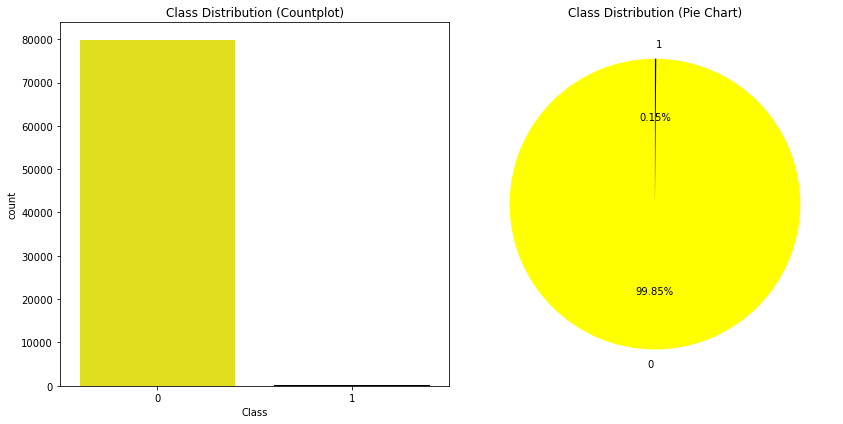

In [10]:

# custom colors for the plot
colors = ['#FFFF00', '#000000']

# Create subplots with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot countplot
sns.countplot('Class', data=df, palette=colors, ax=axs[0])
axs[0].set_title('Class Distribution (Countplot)')

# Plot pie chart
class_counts = df['Class'].value_counts()
axs[1].pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)
axs[1].set_title('Class Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


(1.0, 172792.0)

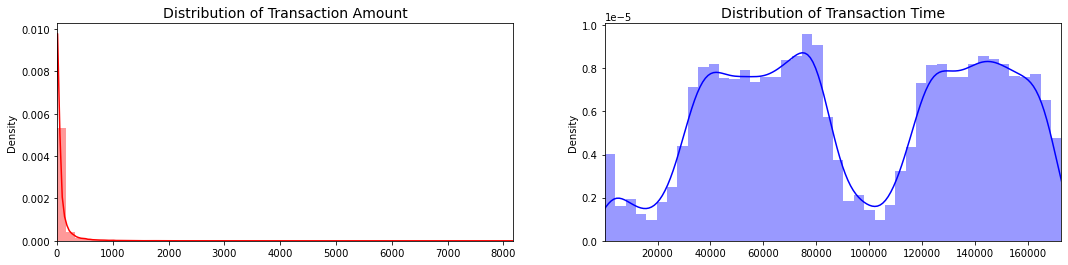

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

## Feature Selection

### **`ANOVA TEST (using Sklearn Library)`**

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif)

# Fit selector to the data
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

# Print selected features
print("Selected Features:", selected_features)


Selected Features: Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


## Data Balancing (SMOTE)

In [13]:
# Redifine X, y using the Selected Features
selected_features = ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
X = df[selected_features]
y = df['Class']

# 1. Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Perform SMOTE (only on training data)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Normalize Numeric Columns (separately for training and testing sets)
scaler = StandardScaler()
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)




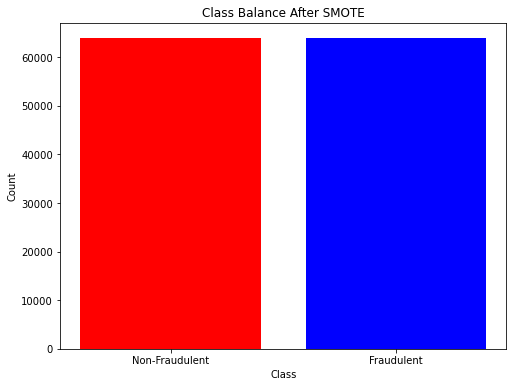

In [14]:
# Plot the class balance after SMOTE
plt.figure(figsize=(8, 6))
plt.bar(y_train_resampled.value_counts().index, y_train_resampled.value_counts().values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Balance After SMOTE')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


In [15]:
# Keeping it simple with the variable names:assign the transformed variables to the simpler variable names 

X_train = X_train_resampled_normalized
y_train = y_train_resampled

In [16]:
X_train_df = pd.DataFrame(X_train, columns =selected_features)
X_train_df


,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,0.667232,0.694711,-0.599871,0.383210,0.587429,-0.221333,0.909831,0.742252,0.527955,0.534881
1,0.673757,0.678957,-0.721152,0.361066,0.622613,-0.221508,0.840697,0.782518,0.821741,0.386532
2,0.688301,0.601192,-0.784756,0.434939,0.612672,-0.196851,0.834052,0.846236,0.730914,0.421150
3,0.159065,0.841773,-0.720501,0.595280,0.764547,-0.555184,0.767820,0.702692,0.559994,0.487438
4,0.609707,0.788635,-0.357917,0.255905,0.561143,0.090960,1.069445,0.710418,0.261819,0.659568
...,...,...,...,...,...,...,...,...,...,...
127799,-1.997590,-2.270153,2.247077,-2.360462,-2.812341,2.073996,-3.054956,-1.986611,-2.996806,-2.816328
127800,-1.672370,-1.825430,0.734526,-1.169686,-0.879049,0.408849,-0.788556,-0.885321,-0.703679,-0.757038
127801,0.081782,-0.111496,-0.704665,0.275929,-0.152055,0.013463,-0.130939,-0.487627,-0.652290,-0.073122
127802,-0.072088,0.098077,-0.049669,0.286397,0.114495,0.148527,-0.046545,-0.614007,-0.229839,-0.219149


In [17]:
y_train_df = pd.DataFrame(y_train, columns= ['Class'])
y_train_df

,Class
0,0
1,0
2,0
3,0
4,0
...,...
127799,1
127800,1
127801,1
127802,1


In [18]:
X_test = X_test_normalized
X_test_df= pd.DataFrame(X_test, columns= selected_features)
X_test_df

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,-0.991517,0.272823,-0.503334,0.307697,0.711695,-0.397313,0.828863,0.847083,0.690881,0.577821
1,0.022268,0.511424,-0.808216,0.547971,0.329422,-0.890381,0.652807,0.664457,0.607781,0.708640
2,0.731258,0.613659,-1.178104,0.332331,1.006451,-0.005756,0.770114,0.720421,0.424992,0.606100
3,0.214084,0.136233,-0.302092,0.653493,0.441159,-0.281938,0.922046,0.866220,0.567814,0.483932
4,0.918022,0.337940,-1.245766,0.218371,1.017064,-1.249898,0.242934,0.714565,0.437519,0.622962
...,...,...,...,...,...,...,...,...,...,...
15995,0.621901,0.690377,-0.763302,0.321621,0.587654,-0.201210,0.723402,0.830088,0.792696,0.442931
15996,0.676894,0.659861,-0.296484,0.457842,0.569298,-1.012327,0.896872,0.662341,0.510581,0.476803
15997,0.035063,0.979207,-0.265805,0.685564,0.650173,0.100788,0.880837,0.680242,0.565811,0.465969
15998,0.879462,0.402976,-1.082006,0.213376,0.840317,-0.541526,0.619294,0.673471,1.040876,0.480165


In [19]:
y_test_df = pd.DataFrame(y_test, columns= ['Class'])
y_test_df

,Class
219224,0
224583,0
18105,0
262435,0
238985,0
...,...
40136,0
19272,0
125359,0
249126,0


In [20]:
X_train_df.values

array([[ 0.66723152,  0.69471089, -0.59987112, ...,  0.74225158,
         0.52795547,  0.5348805 ],
       [ 0.6737566 ,  0.67895727, -0.72115203, ...,  0.78251825,
         0.82174083,  0.38653159],
       [ 0.68830135,  0.60119176, -0.78475553, ...,  0.84623647,
         0.73091371,  0.42115013],
       ...,
       [ 0.08178221, -0.11149645, -0.70466488, ..., -0.48762668,
        -0.65228981, -0.07312163],
       [-0.07208811,  0.09807656, -0.04966916, ..., -0.61400705,
        -0.22983884, -0.2191488 ],
       [ 0.33103018,  0.00810798, -0.79365188, ...,  0.19682375,
         0.6177961 ,  0.85404561]])

In [21]:
np.save('X_train', X_train)

In [22]:
np.save('X_test', X_test)

In [23]:
np.save('y_test', y_test)

In [24]:
np.save('y_train', y_train)

In [25]:
np.load('X_test.npy')

array([[-0.99151661,  0.27282316, -0.50333447, ...,  0.84708267,
         0.69088143,  0.57782052],
       [ 0.02226783,  0.51142448, -0.80821603, ...,  0.6644575 ,
         0.60778113,  0.70863993],
       [ 0.73125802,  0.61365889, -1.17810426, ...,  0.72042057,
         0.42499186,  0.60610008],
       ...,
       [ 0.03506344,  0.97920651, -0.26580537, ...,  0.68024157,
         0.56581119,  0.46596869],
       [ 0.87946217,  0.40297604, -1.08200587, ...,  0.67347131,
         1.04087624,  0.480165  ],
       [ 0.20032198,  0.53015584, -1.00386047, ...,  1.02752328,
         0.56827416,  0.47102136]])

In [26]:
np.load('X_train.npy')

array([[ 0.66723152,  0.69471089, -0.59987112, ...,  0.74225158,
         0.52795547,  0.5348805 ],
       [ 0.6737566 ,  0.67895727, -0.72115203, ...,  0.78251825,
         0.82174083,  0.38653159],
       [ 0.68830135,  0.60119176, -0.78475553, ...,  0.84623647,
         0.73091371,  0.42115013],
       ...,
       [ 0.08178221, -0.11149645, -0.70466488, ..., -0.48762668,
        -0.65228981, -0.07312163],
       [-0.07208811,  0.09807656, -0.04966916, ..., -0.61400705,
        -0.22983884, -0.2191488 ],
       [ 0.33103018,  0.00810798, -0.79365188, ...,  0.19682375,
         0.6177961 ,  0.85404561]])

## Modeling

In [42]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, prediction)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Oranges',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### Logistic Regression

### Decision Tree Classifier

### K-Nearest Neighbours

Cross Validation Score :  99.94%
ROC_AUC Score :  97.46%


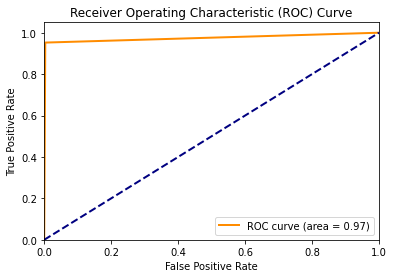

In [35]:
# Training our Vanilla Model using Default Parameters 

# Instantiating KNeighborsClassifier

knn_classifier= KNeighborsClassifier()

model(knn_classifier, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.28      0.95      0.43        21

    accuracy                           1.00     16000
   macro avg       0.64      0.97      0.72     16000
weighted avg       1.00      1.00      1.00     16000



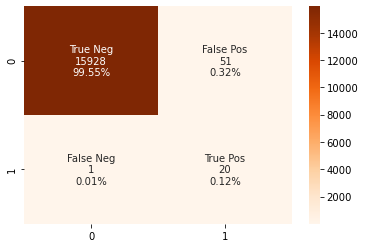

In [43]:
model_evaluation(knn_classifier, X_test, y_test)

In [44]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create the KNN classifier
knn_classifier_tuned = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(knn_classifier_tuned, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Print the best parameter value
print("Best n_neighbors:", best_n_neighbors)


Best n_neighbors: 3


Cross Validation Score :  99.94%
ROC_AUC Score :  97.51%


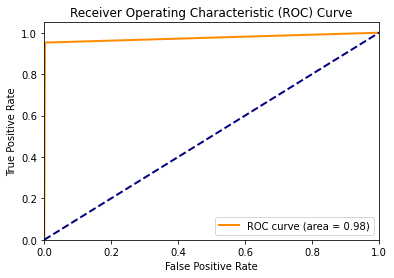

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.28      0.95      0.43        21

    accuracy                           1.00     16000
   macro avg       0.64      0.97      0.72     16000
weighted avg       1.00      1.00      1.00     16000



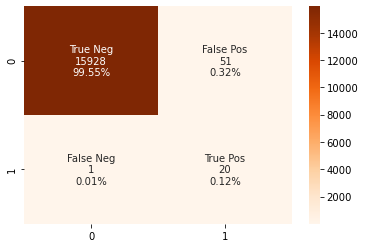

In [45]:
# Test tuned_model with refined paramaters on the test set

# Remember default n_neighbors = 5

knn_classifier_tuned = KNeighborsClassifier(n_neighbors=3)
model(knn_classifier_tuned, X_train, y_train, X_test, y_test)
model_evaluation(knn_classifier, X_test, y_test)

### Random Forest Classifier